In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import bosonic
PKG_PATHS = ["C:\\Users\\micha\\Documents\\code\\quantum-photonic-cnot-gate"] # Windows 
# change for local repo directory
sys.path.extend(PKG_PATHS)
import heralded_cnot as he

In [36]:
import os
os.getcwd()
os.chdir('C:\\Users\\micha\\Downloads')

_Change to save plots on your home directory:_

In [ ]:
savedir = r'C:\Users\micha\OneDrive\Documents\School\QPL\Proposals\DURIP 2020\Figures\Simulation'

## Make the "truth table" for a photonic CNOT gate

Fig. 2e in [Carolan _et al. '15_ ](https://arxiv.org/abs/1505.01182)
The output photons are "heralded" by the detection of the two ancilla photons at ports 2 and 6: that is, detecting the ancilla photons implies with high probability that the gate succeeded.

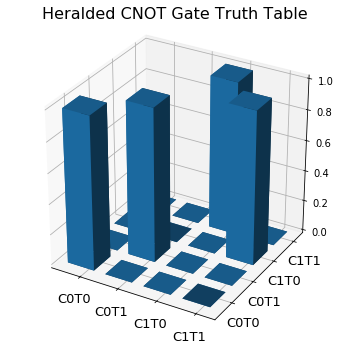

In [27]:
no_samples = 100 # change for a more accurate simulation
output = get_heralded_gate_rate(rel_error=0, no_samples=no_samples)
fig_cnot = plt.figure(figsize=(6,6))
ax1 = fig_cnot.add_subplot(111, projection='3d')
cnot_truth_table_plot = np.array([output[i,:]/np.sum(output[i,:]) for i in range(4)]).ravel()
savedir = r'C:\Users\micha\OneDrive\Documents\School\QPL\Proposals\DURIP 2020\Figures\Simulation'

_x = np.arange(4)
_y = np.arange(4)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
labels = ['C0T0', 'C0T1', 'C1T0', 'C1T1']

top = 1
bottom = np.zeros_like(top)
width = depth = 0.7

ax1.bar3d(x, y, bottom, width, depth, cnot_truth_table_plot, shade=True)
ax1.set_xticks(np.arange(4)+1/2)
ax1.set_yticks(np.arange(4)+1/2)
ax1.set_xticklabels(labels,fontsize=13)
ax1.set_yticklabels(labels,fontsize=13)
# ax1.set_xlabel('Input',fontsize=15,rotation=0)
# ax1.set_ylabel('Output',fontsize=15,rotation=0)
# ax1.yaxis._axinfo['label']['space_factor'] = 1.0
ax1.xaxis.set_rotate_label(False) 
ax1.yaxis.set_rotate_label(False) 
ax1.set_zticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_title('Heralded CNOT Gate Truth Table',fontsize=16,y=1.05)

plt.savefig(savedir + r'\heralded_CNOT_truth_table.png',format='png')

## Generate the "heralding rate" for a gate with input photons entering at 1 MHz

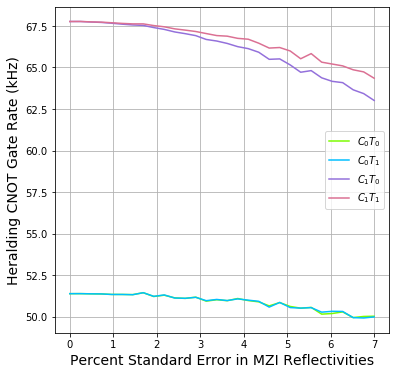

In [16]:
rel_err = np.linspace(0.0,0.07,30)
samples = 700
# output_arr = np.array([get_heralded_gate_rate(err,nsamples=samples) for err in rel_err])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(rel_err*100,1e3*output_arr[:,0,0],'lawngreen')
ax.plot(rel_err*100,1e3*output_arr[:,1,1],'deepskyblue')
ax.plot(rel_err*100,1e3*output_arr[:,2,3],'mediumpurple')
ax.plot(rel_err*100,1e3*output_arr[:,3,2],'palevioletred')
ax.set_ylabel('Heralding CNOT Gate Rate (kHz)',fontsize=14)
ax.set_xlabel('Percent Standard Error in MZI Reflectivities',fontsize=14)
ax.grid('on')
plt.legend(['$C_0T_0$','$C_0T_1$','$C_1T_0$','$C_1T_1$'])

# plt.savefig(savedir + r'\heralded_CNOT_heralding_rates.png',format='png')

### Unheralded gate from [Ralph _et al._ '02](https://ui.adsabs.harvard.edu/abs/2002PhRvA..65f2324R/abstract) 
Note: need to fix, should see ideal truth table as shown above for the heralded gate

In [104]:
unheralded_gate = np.array([[np.sqrt(1/3), 0, 0, 0, np.sqrt(2/3), 0],
                           [0, -np.sqrt(1/2), 1/2, 1/2, 0, 0],
                           [0, 1/2, (1/(2**1.5) + 1/(2*np.sqrt(3))),(1/(2**1.5) - 1/(2*np.sqrt(3))), 0, np.sqrt(1/3)],
                           [0, 1/2, (1/(2**1.5) - 1/(2*np.sqrt(3))),(1/(2**1.5) + 1/(2*np.sqrt(3))), 0, np.sqrt(1/3)],
                           [np.sqrt(2/3), 0, 0, 0, -np.sqrt(1/3), 0],
                           [0, 0, np.sqrt(1/3), -np.sqrt(1/3), 0, -np.sqrt(1/3)]], dtype=complex)
gate_unheralded = bosonic.aa_phi(unheralded_gate, 2)
gate_basis = np.array(bosonic.fock.basis(2, 6)) # Index -> output: 2->C0T0, 3->C0T1, 7->C1T0, 8->C1T1
indices = np.array([2,3,7,8])
cnot_truth_table = np.zeros((np.size(indices),np.size(indices)),dtype=np.double)
for i in range(np.size(indices)):
    hv_input1 = np.zeros((np.size(gate_basis,0)),dtype=complex)
    hv_input1[indices[i]] = 1 + 0j
    outputs_all = np.abs(gate_unheralded.dot(hv_input1)**2)
    cnot_truth_table[i,:] = np.square(np.abs(outputs_all[(2,3,7,8), ]))

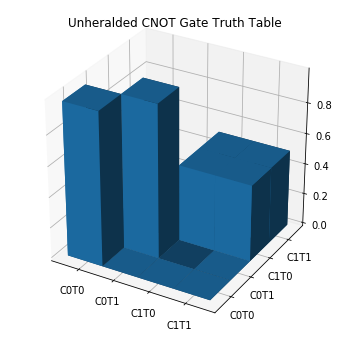

In [136]:
fig_cnot = plt.figure(figsize=(6,6))
ax1 = fig_cnot.add_subplot(111, projection='3d')
cnot_truth_table_plot = np.array([cnot_truth_table[i,:]/np.sum(cnot_truth_table[i,:]) for i in range(4)]).ravel()
savedir = r'C:\Users\micha\OneDrive\Documents\School\QPL\Proposals\DURIP 2020\Figures\Simulation'

_x = np.arange(4)
_y = np.arange(4)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
labels = ['C0T0', 'C0T1', 'C1T0', 'C1T1']

top = 1
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, cnot_truth_table_plot, shade=True)
ax1.set_xticks(np.arange(4)+1/2)
ax1.set_yticks(np.arange(4)+1/2)
ax1.set_xticklabels(labels)
ax1.set_yticklabels(labels)
ax1.set_title('Unheralded CNOT Gate Truth Table')

# plt.savefig(savedir + r'\unheralded_CNOT_truth_table.png',format='png')